In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 生成训练样本
n_dots = 40
X = 5 * np.random.rand(n_dots, 1)  # 生成40行，1列的数组 np.shape(X)===(40,1)
y = np.cos(X).ravel()  # ravel()进行降维操作，返回的是一个视图，会影响原始数据
                      # flateen()返回的是一份拷贝，对返回结果操作，不会影响原始数据
print(y)
# 添加一些噪声
y += 0.2 * np.random.rand(n_dots) - 0.1
print(y)

[-0.05692323 -0.96532027  0.05705803 -0.63593702 -0.26882395 -0.16758272
 -0.90139057 -0.9470703  -0.287251    0.10867706 -0.88031424 -0.01163311
 -0.80021957  0.99271197  0.97998319  0.12804808 -0.96482952  0.87877259
 -0.05988904  0.05649489  0.86256939  0.05833649  0.88922452 -0.86917514
 -0.88501731 -0.2316847  -0.50205008 -0.97715765 -0.99458635 -0.99278598
 -0.61333835  0.31493997  0.883032    0.21450933  0.96072883 -0.8838593
 -0.77839229  0.98849758 -0.00511594 -0.98331744]
[-0.00293878 -1.02635037  0.14669432 -0.5509411  -0.18693876 -0.16646331
 -0.94418    -0.92468021 -0.21925807  0.08066    -0.95000296  0.00411624
 -0.74618764  0.96609855  1.05508981  0.14316017 -0.8859497   0.82356582
 -0.00830034  0.13934591  0.9615259   0.05741615  0.90321063 -0.89412403
 -0.81908804 -0.14178542 -0.49634303 -0.91763785 -1.08864953 -0.99149085
 -0.66438143  0.28235618  0.93396087  0.12177604  0.8720314  -0.95898018
 -0.72094308  0.95981767 -0.02546551 -1.03100495]


In [3]:
# 使用sktlearn里面的KNeighborsRegressor来训练模型
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn = KNeighborsRegressor(k)
# fit(x,y) 使用x作为训练数据，并使用y作为目标值来拟合模型
knn.fit(X, y)
#输出结果：KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
#          metric_params=None, n_jobs=1, n_neighbors=5, p=2,weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

### 如何进行拟合？
```
在X轴上的指定区间内生成足够多的点，针对这些足够密集的点，使用训练出来的模型进行预测，得到预测值
y_pred，然后在坐标轴上把所有的预测点连接起来，这样就可以画出拟合曲线。
```

In [4]:
# 生成足够密集的点并进行预测
T = np.linspace(0, 5, 500)[:, np.newaxis]  # np.newaxis 将一维数组转换为二维的 列
print(np.shape(T))
"""predict()
预测函数   接收输入的数组类型测试样本，一般是二维数组，每一行是一个样本，
每一列是一个属性返回数组类型的预测结果，如果每个样本只有一个输出，则输出为一个一维数组。
如果每个样本的输出是多维的，则输出二维数组，每一行是一个样本，每一列是一维输出。
"""
y_pred = knn.predict(T)
# print(y_pred)

# 使用knn.score()方法计算拟合曲线针对，训练样本集的拟合准确性
knn.score(X, y)

(500, 1)


0.9843287700478025

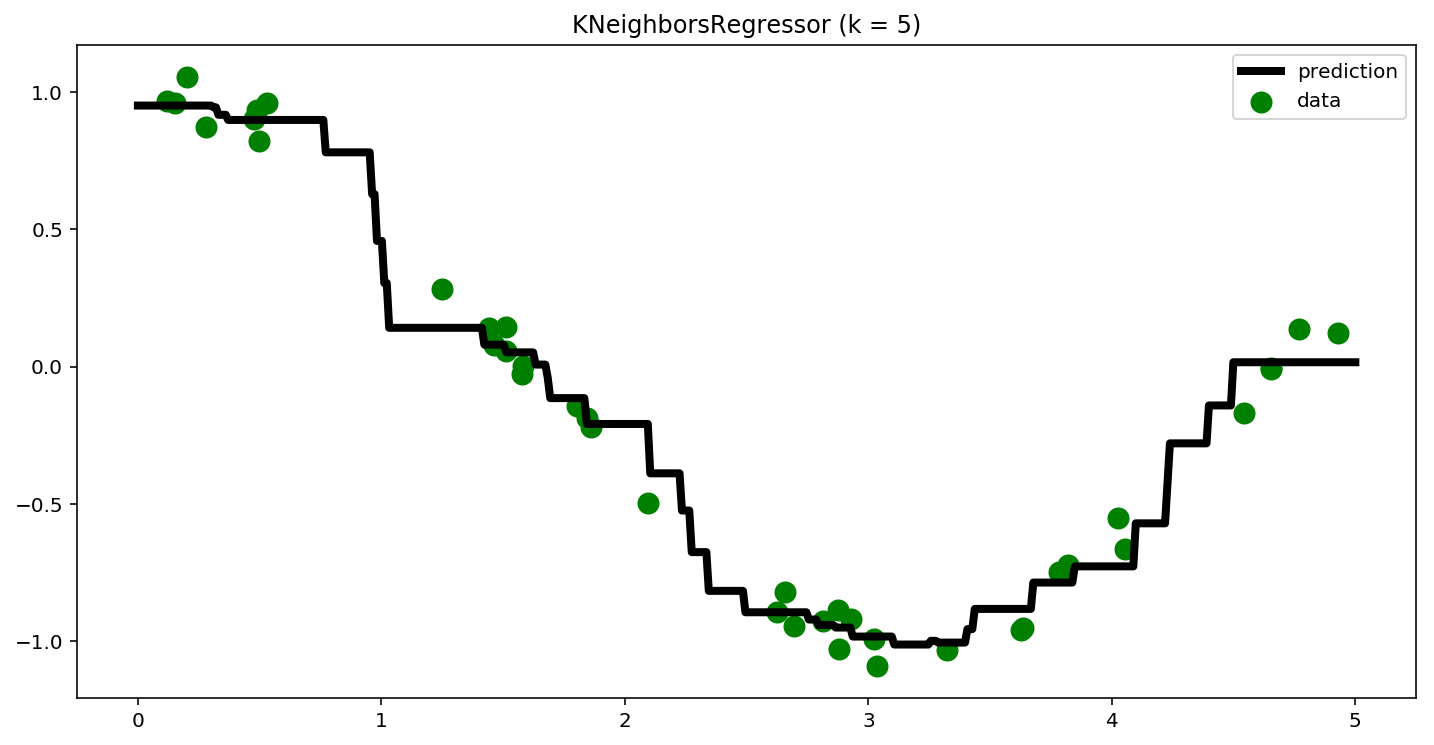

In [5]:
# 画出拟合曲线
plt.figure(figsize=(12, 6), dpi=144)  # Dots Per Inch，每英寸点数 像素点
plt.scatter(X, y, c='g', label='data', s=100)         # 画出训练样本

plt.plot(T, y_pred, c='k', label='prediction', lw=4)  # 画出拟合曲线
plt.axis('tight')
plt.title("KNeighborsRegressor (k = %i)" % k)
plt.legend()
plt.show()